In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from statsmodels.formula.api import ols

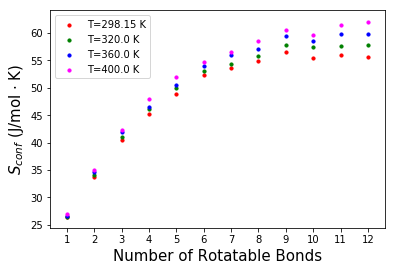

In [93]:
# Load unbranched alkane conformational entropy at different temperature (K)
# C4H10 to C15H32
data = pd.read_csv("Alkane_Temp.csv")

color = ["red","green","blue","magenta"]
for idx, grp in enumerate(data.groupby("Temp")):
    plt.scatter(grp[1]["NumRotor"],grp[1]["ConfEntropy"],color=color[idx],label="T={} K".format(grp[0]),s=10)
plt.xticks(list(range(1,13)))
plt.xlabel("Number of Rotatable Bonds",size=15)
plt.ylabel("$S_{conf}$ (J/mol $\cdot$ K)",size=15)
plt.legend()
plt.show()

In [73]:
# Split into Train and Test by Temperature
datatemp = data.groupby("Temp")
train = pd.concat([datatemp.get_group(x) for x in [298.15,320,400]])
test = datatemp.get_group(360)

In [74]:
# Fit Linear Regression
lm1 = ols('ConfEntropy~np.log1p(NumRotor)+np.log1p(NumRotor)/Temp', train).fit()

print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:            ConfEntropy   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     453.7
Date:                Fri, 26 Feb 2021   Prob (F-statistic):           9.91e-25
Time:                        15:27:33   Log-Likelihood:                -74.456
No. Observations:                  36   AIC:                             154.9
Df Residuals:                      33   BIC:                             159.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

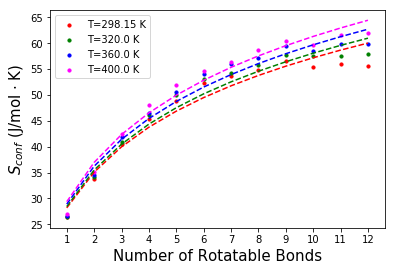

In [100]:
color = ["red","green","blue","magenta"]
for idx, grp in enumerate(datatemp):
    plt.scatter(grp[1]["NumRotor"],grp[1]["ConfEntropy"],color=color[idx],label="T={} K".format(grp[0]),s=10)
    plt.plot(grp[1]["NumRotor"],lm1.predict(grp[1]),color=color[idx],linestyle="--")
plt.xticks(list(range(1,13)))
plt.xlabel("Number of Rotatable Bonds",size=15)
plt.ylabel("$S_{conf}$ (J/mol $\cdot$ K)",size=15)
plt.legend()
plt.show()

In [88]:
print("Training Error (J/mol K)")
print(np.abs(lm1.resid).mean()) # Train Error
print("Testing Error (J/mol K)")
print(np.abs(datatemp.get_group(360)["ConfEntropy"]-lm1.predict(datatemp.get_group(360))).mean()) # Test Error

Training Error (J/mol K)
1.722163667355716
Testing Error (J/mol K)
1.6635688796678403
